<a href="https://colab.research.google.com/github/idanielnava/Laptop-Buying-Guide/blob/main/Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing neccesary libraries

In [ ]:
#Common imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests

#for 'cell magics'
%matplotlib inline 

In [ ]:
#imports needed for Google Sheets
import gspread
from gspread_dataframe import get_as_dataframe, set_with_dataframe
from google.colab import auth

#verification from account for reading files you have acces to
auth.authenticate_user()
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

# Importing/exploring Laptops dataset

In [ ]:
#reading dataset
laptops = pd.read_csv('/content/drive/MyDrive/BUSINESS/CVs/Portfolio Laptops/laptops-dataset.csv', encoding='latin1')

In [ ]:
laptops.dtypes

Unnamed: 0            int64
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object

In [ ]:
laptops.describe(include='object')

,Company,Product,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
count,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303
unique,19,618,6,40,113,9,39,110,9,179
top,Lenovo,XPS 13,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,NVIDIA GeForce GTX 750 DirectX 12.00,Windows 10,2.2kg
freq,297,30,727,507,190,619,412,281,1072,121


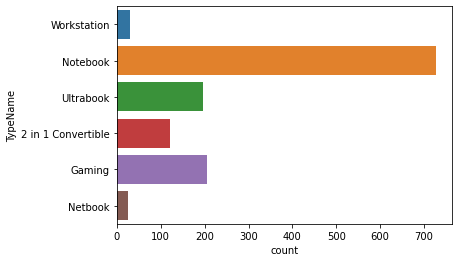

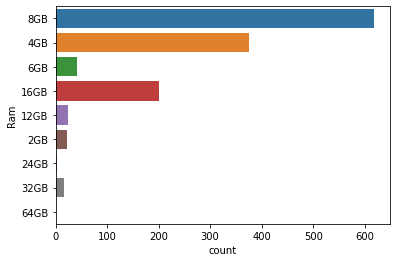

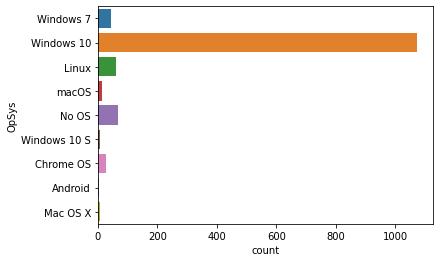

There are a few operating systems that could be grouped in order to make it easier to decide for the final user


In [ ]:
#Plotting categorical variables
for column in laptops.select_dtypes(include='object'):
    if laptops[column].nunique() < 10:
        sns.countplot(y=column, data=laptops)
        plt.show()
print("There are a few operating systems that could be grouped in order to make it easier to decide for the final user")

# Cleaning/transforming Laptops dataset


In [ ]:
#Renaming columns
laptops.rename(columns= {'Unnamed: 0':'Index', 'Company':'Brand' ,'Product':'Product name', 'TypeName':'Type', 'Inches':'Screen size (in)', 'OpSys':'OS', 'Price_euros':'Price (euro)', 'Ram':'Ram (GB)'}, inplace= True)
laptops.head()

,Index,Brand,Product name,Type,Screen size (in),ScreenResolution,Cpu,Ram (GB),Memory,Gpu,OS,Weight,Price (euro)
0,1101,HP,ZBook 15u,Workstation,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8GB,256GB SSD,AMD Radeon HD 7850 DirectX 12.00,Windows 7,1.9kg,1495.0
1,234,HP,ZBook 15u,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon HD 7870 DirectX 12.00,Windows 10,1.9kg,1269.0
2,478,HP,ZBook 15u,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,500GB HDD,AMD Radeon HD 7870 DirectX 12.00,Windows 10,1.9kg,1154.0
3,393,Dell,Precision 3510,Workstation,15.6,Full HD 1920x1080,Intel Core i5 6440HQ 2.6GHz,8GB,500GB HDD,AMD Radeon HD 7950 DirectX 12.00,Windows 10,2.23kg,1369.0
4,1118,HP,ZBook 17,Workstation,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,AMD Radeon HD 7970 DirectX 12.00,Windows 7,3.0kg,2899.0


In [ ]:
#Cleaning 'kg' string from weight column and transforming it to float
laptops['Weight (kg)'] = laptops['Weight'].str.replace('kg', '').apply(pd.to_numeric, errors = 'coerce')
laptops.drop('Weight', axis=1, inplace=True)

In [ ]:
#Splitting "Memory" for better handling
laptops[['Memory (GB)', 'Memory type']] = laptops['Memory'].str.split(' ', n=1, expand=True)
laptops['Memory (GB)'] = laptops['Memory (GB)'].str.replace('GB','')
laptops['Memory (GB)'] = laptops['Memory (GB)'].str.replace('TB','')
laptops['Memory (GB)'] = laptops['Memory (GB)'].apply(pd.to_numeric, errors = 'coerce')
laptops['Memory (GB)'] = laptops['Memory (GB)'].replace(1,1000)
laptops['Second memory'] = laptops['Memory type'].str.split("+")
laptops.drop('Memory', axis=1, inplace=True)
#laptops.head()

In [ ]:
laptops['Memory (GB)'].value_counts()

256.0     508
1000.0    250
128.0     177
512.0     140
500.0     132
32.0       45
64.0       17
2.0        16
16.0       10
180.0       5
240.0       1
508.0       1
8.0         1
Name: Memory (GB), dtype: int64

In [ ]:
#Split "Memory type" to find secondary memories
laptops[['Memory type', 'Second memory']] = laptops['Memory type'].str.split('+', n=1, expand=True)

In [ ]:
#Splitting Screen resolution
laptops['Screen resolution'] = laptops['ScreenResolution'].str[-9:]
laptops['Screen type'] = laptops['ScreenResolution'].str[:-9]
laptops.drop('ScreenResolution', axis=1, inplace=True)

In [ ]:
#Splitting "Cpu" into "Cpu" and "CPU speed"
laptops['CPU speed (GHz)'] = laptops['Cpu'].str[-6:]
laptops['CPU speed (GHz)'] = laptops['CPU speed (GHz)'].str[:3]
laptops['Cpu'] = laptops['Cpu'].apply(lambda x: x[:-6])

In [ ]:
#Split "Cpu" into "CPU brand" and "CPU name"
laptops[['CPU brand', 'CPU name']] = laptops['Cpu'].str.split(' ', n=1, expand=True)
laptops.drop('Cpu', axis=1, inplace=True)

In [ ]:
#Unifing similar Operating System names
laptops.loc[laptops['OS']== 'macOS', 'OS'] = 'Mac OS'
laptops.loc[laptops['OS']== 'Mac OS X', 'OS'] = 'Mac OS'
laptops.loc[laptops['OS']== 'Windows 10 S', 'OS'] = 'Windows 10'
laptops.head()

,Index,Brand,Product name,Type,Screen size (in),Ram (GB),Gpu,OS,Price (euro),Weight (kg),Memory (GB),Memory type,Second memory,Screen resolution,Screen type,CPU speed (GHz),CPU brand,CPU name
0,1101,HP,ZBook 15u,Workstation,15.6,8GB,AMD Radeon HD 7850 DirectX 12.00,Windows 7,1495.0,1.90,256.0,SSD,None,1920x1080,Full HD,2.5,Intel,Core i7 6500U
1,234,HP,ZBook 15u,Notebook,15.6,8GB,AMD Radeon HD 7870 DirectX 12.00,Windows 10,1269.0,1.90,1000.0,HDD,None,1920x1080,Full HD,2.7,Intel,Core i7 7500U
2,478,HP,ZBook 15u,Notebook,15.6,8GB,AMD Radeon HD 7870 DirectX 12.00,Windows 10,1154.0,1.90,500.0,HDD,None,1920x1080,Full HD,2.5,Intel,Core i5 7200U
3,393,Dell,Precision 3510,Workstation,15.6,8GB,AMD Radeon HD 7950 DirectX 12.00,Windows 10,1369.0,2.23,500.0,HDD,None,1920x1080,Full HD,2.6,Intel,Core i5 6440HQ
4,1118,HP,ZBook 17,Workstation,17.3,8GB,AMD Radeon HD 7970 DirectX 12.00,Windows 7,2899.0,3.00,1000.0,HDD,None,1920x1080,IPS Panel Full HD,2.6,Intel,Core i7 6700HQ


In [ ]:
laptops['Ram (GB)'] = laptops['Ram (GB)'].str.replace('GB','')
laptops['Ram (GB)'] = laptops['Ram (GB)'].apply(pd.to_numeric, errors = 'coerce')

# Scrapping/Merging GPUs rank dataset

In [ ]:
#Getting url to scrape
url= 'https://benchmarks.ul.com/compare/best-gpus'
#Parsing HTML and reading desired table
list_= pd.read_html(url, header= 0)

In [ ]:
#Creating dataset with desired table
gpu_ranking= pd.DataFrame(list_[0], columns= ['Rank', 'Device', 'MSRP Price',	'3DMark Graphics Score', 'Value for Money', 'Popularity'])
gpu_ranking= gpu_ranking[['Device','Rank', '3DMark Graphics Score']]
#Renaiming cols 
gpu_ranking= gpu_ranking.rename(columns= {'Rank':'GPU Rank', '3DMark Graphics Score':'GPU Graphic Score'})

In [ ]:
#Merging gpu_raking to main dataframe
laptops_gpus= laptops.merge(gpu_ranking, how= 'left', left_on= 'Gpu', right_on= 'Device')
laptops_gpus.drop('Device', axis=1, inplace=True)
laptops_gpus.head()

,Index,Brand,Product name,Type,Screen size (in),Ram (GB),Gpu,OS,Price (euro),Weight (kg),Memory (GB),Memory type,Second memory,Screen resolution,Screen type,CPU speed (GHz),CPU brand,CPU name,GPU Rank,GPU Graphic Score
0,1101,HP,ZBook 15u,Workstation,15.6,8,AMD Radeon HD 7850 DirectX 12.00,Windows 7,1495.0,1.90,256.0,SSD,None,1920x1080,Full HD,2.5,Intel,Core i7 6500U,156,1329
1,234,HP,ZBook 15u,Notebook,15.6,8,AMD Radeon HD 7870 DirectX 12.00,Windows 10,1269.0,1.90,1000.0,HDD,None,1920x1080,Full HD,2.7,Intel,Core i7 7500U,148,1667
2,478,HP,ZBook 15u,Notebook,15.6,8,AMD Radeon HD 7870 DirectX 12.00,Windows 10,1154.0,1.90,500.0,HDD,None,1920x1080,Full HD,2.5,Intel,Core i5 7200U,148,1667
3,393,Dell,Precision 3510,Workstation,15.6,8,AMD Radeon HD 7950 DirectX 12.00,Windows 10,1369.0,2.23,500.0,HDD,None,1920x1080,Full HD,2.6,Intel,Core i5 6440HQ,138,1923
4,1118,HP,ZBook 17,Workstation,17.3,8,AMD Radeon HD 7970 DirectX 12.00,Windows 7,2899.0,3.00,1000.0,HDD,None,1920x1080,IPS Panel Full HD,2.6,Intel,Core i7 6700HQ,130,2280


# Exporting final dataset


In [ ]:
laptops_gpus.describe()

,Index,Screen size (in),Ram (GB),Price (euro),Weight (kg),Memory (GB),GPU Rank,GPU Graphic Score
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,8.382195,1123.686992,2.038734,418.081351,149.209517,1945.126631
std,381.172104,1.426304,5.084665,699.009043,0.665475,314.443017,37.203986,2020.450220
min,1.000000,10.100000,2.000000,174.000000,0.690000,2.000000,6.000000,194.000000
25%,331.500000,14.000000,4.000000,599.000000,1.500000,256.000000,134.500000,986.000000
50%,659.000000,15.600000,8.000000,977.000000,2.040000,256.000000,155.000000,1359.000000
75%,990.500000,15.600000,8.000000,1487.880000,2.300000,512.000000,169.000000,2118.500000
max,1320.000000,18.400000,64.000000,6099.000000,4.700000,1000.000000,199.000000,17686.000000


In [ ]:
laptops_gpus.describe(include='object')

,Brand,Product name,Type,Gpu,OS,Memory type,Second memory,Screen resolution,Screen type,CPU speed (GHz),CPU brand,CPU name
count,1303,1303,1303,1303,1303,1303,208,1303,1303,1303,1303,1303
unique,19,618,6,110,7,7,6,16,25,28,3,93
top,Lenovo,XPS 13,Notebook,NVIDIA GeForce GTX 750 DirectX 12.00,Windows 10,SSD,1TB HDD,1920x1080,Full HD,2.5,Intel,Core i5 7200U
freq,297,30,727,281,1080,637,185,841,507,290,1240,191


In [ ]:
laptops_gpus['Second memory'].value_counts()

  1TB HDD         185
  2TB HDD          15
  256GB SSD         3
  500GB HDD         2
  1.0TB Hybrid      2
  512GB SSD         1
Name: Second memory, dtype: int64

In [ ]:
#Ordering columns
laptops_gpus = laptops_gpus[['Index', 'Brand', 'Product name', 'Type', 'Screen type' ,'Screen size (in)', 'Screen resolution', 'CPU brand', 'CPU name', 'CPU speed (GHz)', 'Ram (GB)','Memory (GB)', 'Memory type', 'Second memory', 'Gpu','GPU Rank', 'GPU Graphic Score', 'OS', 'Price (euro)', 'Weight (kg)', ]]
laptops_gpus.head()

,Index,Brand,Product name,Type,Screen type,Screen size (in),Screen resolution,CPU brand,CPU name,CPU speed (GHz),Ram (GB),Memory (GB),Memory type,Second memory,Gpu,GPU Rank,GPU Graphic Score,OS,Price (euro),Weight (kg)
0,1101,HP,ZBook 15u,Workstation,Full HD,15.6,1920x1080,Intel,Core i7 6500U,2.5,8,256.0,SSD,None,AMD Radeon HD 7850 DirectX 12.00,156,1329,Windows 7,1495.0,1.90
1,234,HP,ZBook 15u,Notebook,Full HD,15.6,1920x1080,Intel,Core i7 7500U,2.7,8,1000.0,HDD,None,AMD Radeon HD 7870 DirectX 12.00,148,1667,Windows 10,1269.0,1.90
2,478,HP,ZBook 15u,Notebook,Full HD,15.6,1920x1080,Intel,Core i5 7200U,2.5,8,500.0,HDD,None,AMD Radeon HD 7870 DirectX 12.00,148,1667,Windows 10,1154.0,1.90
3,393,Dell,Precision 3510,Workstation,Full HD,15.6,1920x1080,Intel,Core i5 6440HQ,2.6,8,500.0,HDD,None,AMD Radeon HD 7950 DirectX 12.00,138,1923,Windows 10,1369.0,2.23
4,1118,HP,ZBook 17,Workstation,IPS Panel Full HD,17.3,1920x1080,Intel,Core i7 6700HQ,2.6,8,1000.0,HDD,None,AMD Radeon HD 7970 DirectX 12.00,130,2280,Windows 7,2899.0,3.00


In [ ]:
laptops_gpus.to_csv('/content/drive/MyDrive/BUSINESS/CVs/Portfolio Laptops/LAPTOPS_DATASET.csv', encoding='utf-8', index= False)